In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path ke folder utama di Google Drive
drive_path = '/content/drive/MyDrive/'
main_folder = 'data_sortir_split'

In [ ]:
# Path ke folder train, val, dan test
train_folder = os.path.join(drive_path, main_folder, 'train')
val_folder = os.path.join(drive_path, main_folder, 'val')
test_folder = os.path.join(drive_path, main_folder, 'test')

# Tampilkan isi folder
print(f"Isi folder 'train': {os.listdir(train_folder)}")
print(f"Isi folder 'val': {os.listdir(val_folder)}")
print(f"Isi folder 'test': {os.listdir(test_folder)}")

Isi folder 'train': ['Cassava___green_mottle', 'Cassava___mosaic_disease', 'Cassava___bacterial_blight', 'Cassava___healthy', 'Cassava___brown_streak_disease', 'Pythium Fruit Rot', 'Gummy Stem Blight', 'Fresh Leaf', 'Fresh Cucumber', 'Downy Mildew', 'Belly Rot', 'Bacterial Wilt', 'Anthracnose', 'Phytopthora', 'Healthy', 'Pest', 'Fungi', 'Virus', 'Nematode', 'Bacteria', 'Wilt Disease', 'Insect Pest Disease', 'Leaf Spot Disease', 'White Mold Disease', 'Healthy Leaf', 'Mosaic Virus Disease', 'Powdery_Mildew', 'Mosaic Disease', 'Bacterial Leaf Spot', 'LeafCurl', 'Yelowwiss', 'DaunSehat', 'Karat_Daun', 'Daun_Sehat', 'Bercak_Daun', 'Hawar_Daun', 'Insect Hole', 'Black Rot', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Target_Spot', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'BrownSpot', 'Tungro', 'Blas

In [ ]:
# Data augmentation untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescale untuk validasi dan testing
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Ukuran batch dan target size
batch_size = 16
target_size = (299, 299)  # InceptionV3 memerlukan 299x299

# Generator data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2192 images belonging to 52 classes.
Found 274 images belonging to 52 classes.
Found 276 images belonging to 52 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Hitung jumlah kelas
num_classes = len(os.listdir(train_folder))

# Bangun model InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Tambahkan lapisan tambahan
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Gabungkan model
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
# Pelatihan model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator,
    callbacks=[earlystop_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1029s 7s/step - accuracy: 0.2189 - loss: 3.0661 - val_accuracy: 0.0255 - val_loss: 242.0714
Epoch 2/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 121s 883ms/step - accuracy: 0.4181 - loss: 1.7612 - val_accuracy: 0.2774 - val_loss: 5.0493
Epoch 3/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 122s 887ms/step - accuracy: 0.5525 - loss: 1.3084 - val_accuracy: 0.3139 - val_loss: 3.7610
Epoch 4/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 125s 916ms/step - accuracy: 0.6374 - loss: 1.0724 - val_accuracy: 0.3540 - val_loss: 5.3636
Epoch 5/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 123s 894ms/step - accuracy: 0.6884 - loss: 0.9043 - val_accuracy: 0.4161 - val_loss: 2.6829
Epoch 6/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 121s 882ms/step - accuracy: 0.6940 - loss: 0.8868 - val_accuracy: 0.4380 - val_loss: 2.8744
Epoch 7/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 125s 912ms/step - accuracy: 0.7348 - loss: 0.7705 - val_accuracy: 0.6496 - val_loss: 1.4381
Epoch 8/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 122s 887ms/step - accuracy: 

In [ ]:
# Simpan model
model_save_path = '/content/drive/My Drive/inceptionv3.h5'
model.save(model_save_path)
print(f" Model disimpan ke: {model_save_path}")

 Model disimpan ke: /content/drive/My Drive/inceptionv3.h5


In [ ]:
import pickle

# Ambil label map dari generator
label_inception = train_generator.class_indices

# Simpan ke file .pkl
with open('/content/drive/My Drive/label_inception.pkl', 'wb') as f:
    pickle.dump(label_inception, f)

print("label_inception berhasil disimpan.")

label_inception berhasil disimpan.


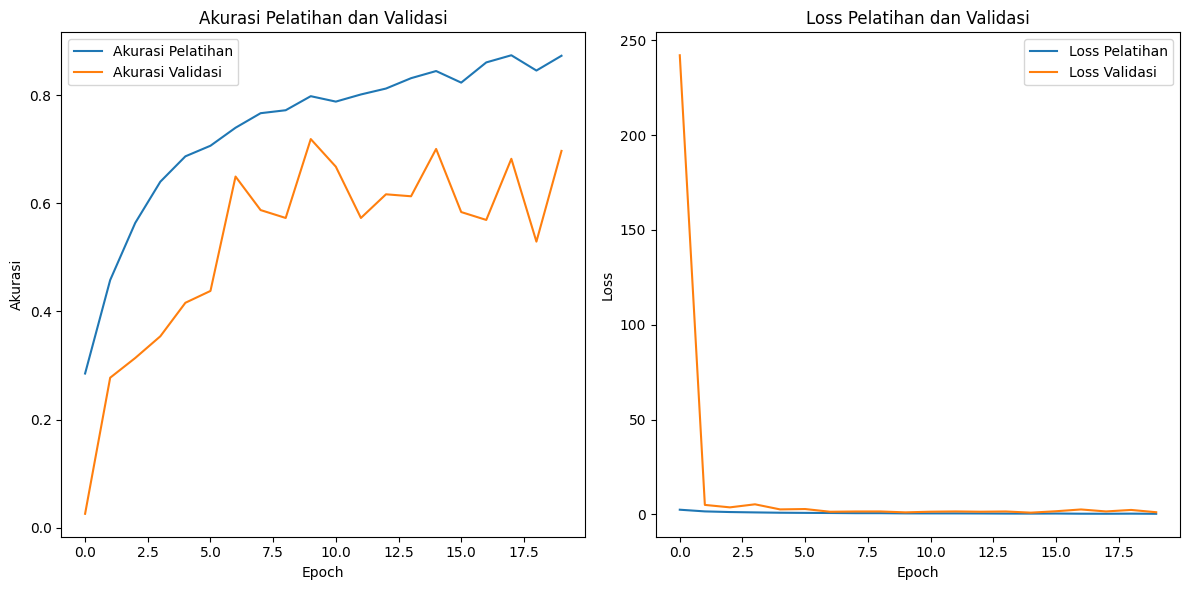

In [ ]:
# Ekstrak riwayat pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot akurasi dan loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Akurasi Pelatihan')
plt.plot(val_accuracy, label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Loss Pelatihan')
plt.plot(val_loss, label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 122s 7s/step
Confusion Matrix
[[4 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 1 4 0]
 [0 0 0 ... 0 0 5]]
Akurasi: 0.7210
Recall: 0.7218
Presisi: 0.7695
Skor F1: 0.7034

Laporan Klasifikasi:

                                               precision    recall  f1-score   support

                                  Anthracnose       0.67      0.80      0.73         5
                                     Bacteria       0.83      1.00      0.91         5
                          Bacterial Leaf Spot       0.71      1.00      0.83         5
                               Bacterial Wilt       1.00      0.20      0.33         5
                              BacterialBlight       0.50      1.00      0.67         5
                                    Belly Rot       0.75      0.60      0.67         5
                                  Bercak_Daun       0.83      0.83      0.83         6
                                    Blac

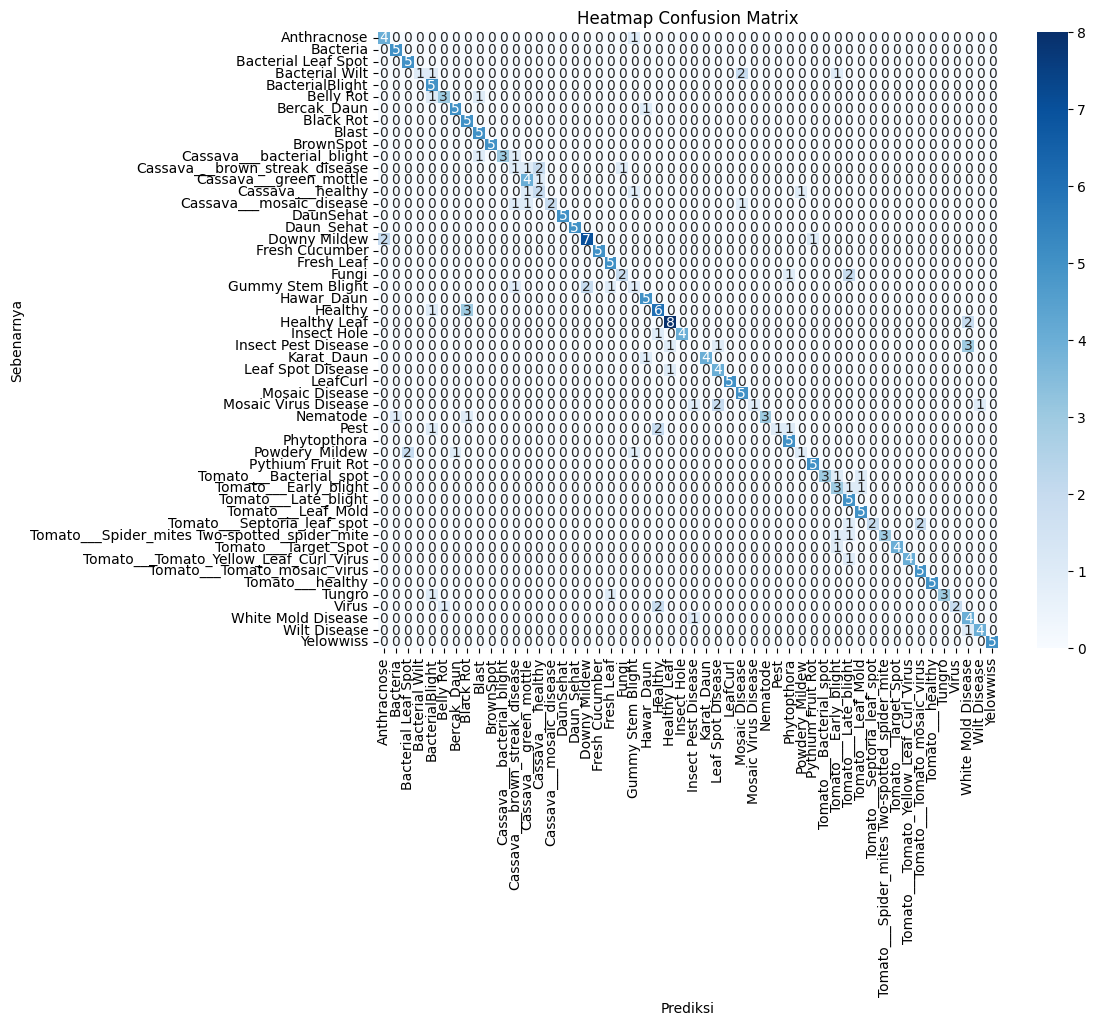

In [ ]:
# Evaluasi model
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(conf_matrix)

# Metrik evaluasi
accuracy = accuracy_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes, average='macro')
precision = precision_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'Akurasi: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Skor F1: {f1:.4f}')

# Laporan klasifikasi
print('\nLaporan Klasifikasi:\n')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Heatmap confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Heatmap Confusion Matrix')
plt.show()